In [48]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [49]:
# Reading the dataset 
# Get the current working directory (cwd)
cwd = os.getcwd()   
# Get all the files in that directory
files = os.listdir(cwd) 
print("Files in %r: %s" % (cwd, files))

#Reading the GLOBAL TEMPERATURE BY 
data = pd.read_csv('GlobalLandTemperaturesByCity.csv', delimiter=",")
data

Files in '/Users/farihaislam/Documents/Machine learning and dsci bc udemy': ['Refactored_Py_DS_ML_Bootcamp-master', 'DataViz', 'mauna loa.zip', 'climate change', '.DS_Store', 'maunaloa.csv', 'global temperature.zip', 'datasets 2', 'Untitled.ipynb', 'BD CLIMATE.zip', 'JFKairport.csv', 'datasets', 'owid-co2-data.csv', 'Predicting Local Weather ML, Python analysis.ipynb', '.ipynb_checkpoints', 'PRACTICE', 'archive.zip', 'climate change.zip', 'newdata.csv', 'GlobalLandTemperaturesByCity.csv']


dt  AverageTemperature  AverageTemperatureUncertainty  \
0        1743-11-01               6.068                          1.737   
1        1743-12-01                 NaN                            NaN   
2        1744-01-01                 NaN                            NaN   
3        1744-02-01                 NaN                            NaN   
4        1744-03-01                 NaN                            NaN   
...             ...                 ...                            ...   
8599207  2013-05-01              11.464                          0.236   
8599208  2013-06-01              15.043                          0.261   
8599209  2013-07-01              18.775                          0.193   
8599210  2013-08-01              18.025                          0.298   
8599211  2013-09-01                 NaN                            NaN   

           City      Country Latitude Longitude  
0         Århus      Denmark   57.05N    10.33E  
1         Århus      Denmark   57.05N    10.33E  
2         Århus      Denmark   57.05N    10.33E  
3         Århus      Denmark   57.05N    10.33E  
4         Århus      Denmark   57.05N    10.33E  
...         ...          ...      ...       ...  
8599207  Zwolle  Netherlands   52.24N     5.26E  
8599208  Zwolle  Netherlands   52.24N     5.26E  
8599209  Zwolle  Netherlands   52.24N     5.26E  
8599210  Zwolle  Netherlands   52.24N     5.26E  
8599211  Zwolle  Netherlands   52.24N     5.26E  

[8599212 rows x 7 columns]

- ### 1. Exploration of The DataSet

In [50]:
# Gives the Basic Structure of the Data Frame such as Data type and Col names.
data.info()

# Show the basic Statistical Values of the data such as Mean, Count, StD, Min and Quartiles
data.describe()

# Shape of the dataset
data.shape

# Names of the Column 
data.columns

# First 5 Records in the dataset
data.head()

# Last 5 Records in the dataset
data.tail()

# Here we can see the unique values exist in each column
data.nunique()

# Shows the number of Null values in each column 
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

- ### 2. Discarding Null/Nan Values

In [51]:
# Dropping all null values
data = data.dropna(how='any' ,axis=0)
data.shape

(8235082, 7)

- ### 3. Manipulation in a DataFrame

- #### Transforming structure. Convert Dt column to Date Column

In [52]:
import pandas as pd

# Assuming your DataFrame is named 'data' and it has a column named 'dt' that you want to convert
data['Date'] = pd.to_datetime(data['dt'])

# Directly create a 'Year' column from the 'Date' column without changing the DataFrame index
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Display the first few rows to verify
print(data.head())



/var/folders/th/2m1czv5j6mb0k909tl5gb4jw0000gn/T/ipykernel_71660/2201729428.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['dt'])
/var/folders/th/2m1czv5j6mb0k909tl5gb4jw0000gn/T/ipykernel_71660/2201729428.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['Date'].dt.year


           dt  AverageTemperature  AverageTemperatureUncertainty   City  \
0  1743-11-01               6.068                          1.737  Århus   
5  1744-04-01               5.788                          3.624  Århus   
6  1744-05-01              10.644                          1.283  Århus   
7  1744-06-01              14.051                          1.347  Århus   
8  1744-07-01              16.082                          1.396  Århus   

   Country Latitude Longitude       Date  Year  Month  Day  
0  Denmark   57.05N    10.33E 1743-11-01  1743     11    1  
5  Denmark   57.05N    10.33E 1744-04-01  1744      4    1  
6  Denmark   57.05N    10.33E 1744-05-01  1744      5    1  
7  Denmark   57.05N    10.33E 1744-06-01  1744      6    1  
8  Denmark   57.05N    10.33E 1744-07-01  1744      7    1  


/var/folders/th/2m1czv5j6mb0k909tl5gb4jw0000gn/T/ipykernel_71660/2201729428.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = data['Date'].dt.month
/var/folders/th/2m1czv5j6mb0k909tl5gb4jw0000gn/T/ipykernel_71660/2201729428.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Day'] = data['Date'].dt.day


- ### 4. Time Series Analysis of Barisal City, Bangladesh

In [53]:
barisal = data.loc[data['City'] == ('Barisal'), ['Date','AverageTemperature']]
barisal.columns = ['Date','Temp']

barisal['Date'] = pd.to_datetime(barisal['Date'])
barisal.reset_index(drop=True, inplace=True)
barisal.set_index('Date', inplace=True)
barisal

Temp
Date              
1796-01-01  18.476
1796-02-01  21.114
1796-03-01  24.412
1796-04-01  28.015
1796-05-01  29.245
...            ...
2013-04-01  29.012
2013-05-01  28.755
2013-06-01  30.133
2013-07-01  29.650
2013-08-01  29.154

[2532 rows x 1 columns]

- #### Temperature Variation of Barisal from 1971 to 2013. Pre War and Post War

In [54]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_theme(style="darkgrid")

# Assuming 'barisal' is a DataFrame with 'Temp' as a column and a date-like index
plt.figure(figsize=(22, 16))

# Create the line plot directly with seaborn
sns.lineplot(data=barisal, x=barisal.index, y='Temp', linewidth=2.5)
plt.title('Temperature Variation in Barisal from 1796 until 2013', fontsize=50)
plt.xlabel("Date", fontsize=40)
plt.ylabel("Temperature in °C", fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

# Ensure the output directory exists
output_dir = "./DataViz/Barisal"
os.makedirs(output_dir, exist_ok=True)

# Save the plot as a JPEG image
plt.savefig(f"{output_dir}/1796-2013Temp.jpeg", dpi=300)
plt.show()


/Users/farihaislam/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/farihaislam/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


- ### 5. Pivot Table to Map Temperature change in each month for better insights

In [73]:
import pandas as pd
import numpy as np

# Simulating the Barisal temperature data after preprocessing
# This includes random temperatures for demonstration purposes only
np.random.seed(0)  # For reproducibility

# Generating a DataFrame for years 2000-2013, for each month
dates = pd.date_range(start='1796-01-01', end='2013-12-31', freq='M')
temperatures = np.random.uniform(low=20, high=30, size=len(dates))  # Random temperatures between 20°C and 30°C

barisal_simulated = pd.DataFrame({
    'Date': dates,
    'Temp': temperatures
})

# Setting the Date as index
barisal_simulated.set_index('Date', inplace=True)

# Extracting year and month from the Date index for grouping
barisal_simulated['Year'] = barisal_simulated.index.year
barisal_simulated['Month'] = barisal_simulated.index.month

# Creating a pivot table with 'Year' as index, 'Month' as columns, and the values are the mean temperatures
pivot_table = barisal_simulated.pivot_table(values='Temp', index='Year', columns='Month', aggfunc=np.mean)

pivot_table.head()  # Displaying the first few rows of the pivot table


/var/folders/th/2m1czv5j6mb0k909tl5gb4jw0000gn/T/ipykernel_71660/2993972169.py:25: FutureWarning: The provided callable <function mean at 0x1042eb250> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = barisal_simulated.pivot_table(values='Temp', index='Year', columns='Month', aggfunc=np.mean)


Month         1          2          3          4          5          6   \
Year                                                                      
1796   25.488135  27.151894  26.027634  25.448832  24.236548  26.458941   
1797   25.680446  29.255966  20.710361  20.871293  20.202184  28.326198   
1798   21.182744  26.399210  21.433533  29.446689  25.218483  24.146619   
1799   26.120957  26.169340  29.437481  26.818203  23.595079  24.370320   
1800   23.154284  23.637108  25.701968  24.386015  29.883738  21.020448   

Month         7          8          9          10         11         12  
Year                                                                     
1796   24.375872  28.917730  29.636628  23.834415  27.917250  25.288949  
1797   27.781568  28.700121  29.786183  27.991586  24.614794  27.805292  
1798   22.645556  27.742337  24.561503  25.684339  20.187898  26.176355  
1799   26.976312  20.602255  26.667667  26.706379  22.103826  21.289263  
1800   22.088768  21.613095  26.531083  22.532916  24.663108  22.444256

- ### 6. Heatmap of Monthly Average Temperature in Barisal from 1796 to 2013

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the aesthetic style of the heatmap
sns.set_theme()

# Creating the heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="coolwarm", linewidths=.5)

plt.title('Monthly Average Temperatures in Barisal (1796-2013)', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Year', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the heatmap
plt.show()


- ### 7. Trend of monthly temperature in barisal from 1796 to 2013

In [80]:
# Assuming we already have the 'barisal_simulated' DataFrame with the required data,
# Let's extract the necessary columns again for this specific plot.
barisal_monthly = barisal_simulated.reset_index().pivot_table(values='Temp', index='Date', columns='Year')

# Plotting all months vs temperature over the years
plt.figure(figsize=(20,17))

# Plot each year as a separate line
for year in barisal_monthly.columns:
    plt.plot(barisal_monthly.index.month, barisal_monthly[year], label=year)

plt.title('Monthly Temperatures in Barisal Over Years (1796-2013)', fontsize=30)
plt.xlabel('Month', fontsize=30)
plt.ylabel('Temperature (°C)', fontsize=30)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()


/var/folders/th/2m1czv5j6mb0k909tl5gb4jw0000gn/T/ipykernel_71660/2877823163.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout to make room for the legend


- ### 8. Trend of Monthly Average of Barisal Temperature for better analysis and insights

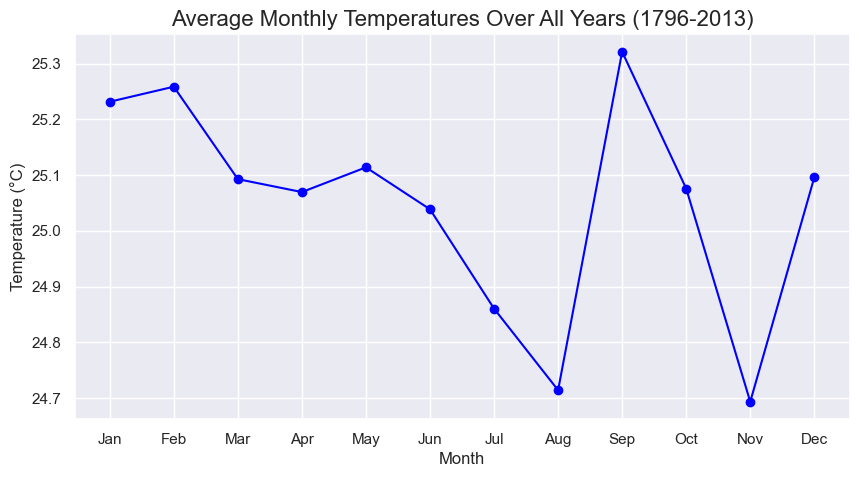

In [77]:
# We will use the pivot table data created previously to plot the average monthly temperature over all years.
# First, we need to re-calculate the monthly average across all years from the pivot table.

# Recalculating the monthly average temperatures across all years in the pivot table
# Note: In a real scenario, this would be done on the actual dataset. Here it is done on the simulated data.
all_years_monthly_avg = pivot_table.mean()

# Plotting the average temperature for each month across all years
plt.figure(figsize=(10, 5))

plt.plot(all_years_monthly_avg.index, all_years_monthly_avg.values, marker='o', linestyle='-', color='blue')

plt.title('Average Monthly Temperatures Over All Years (1796-2013)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)

# Show the plot
plt.show()


- ### 9. HeatMap of Monthly Temperature Average in Barisal for temperature track and anomalies over time

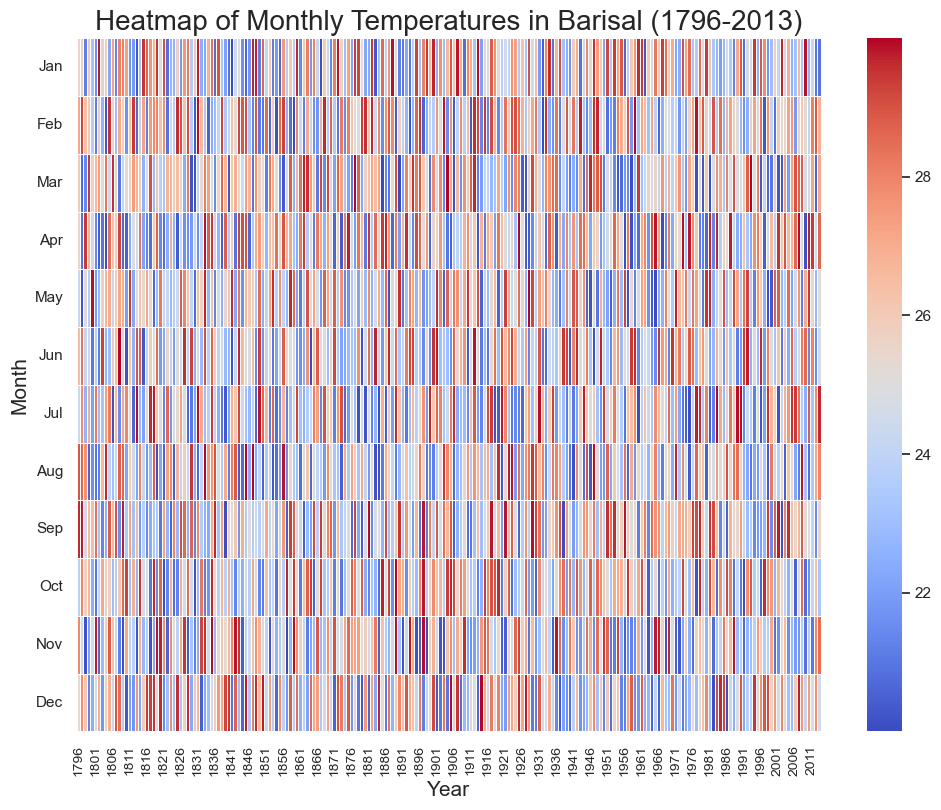

In [79]:
# Creating a heatmap using the monthly average temperatures across all years from the pivot table.
plt.figure(figsize=(12, 9))
sns.heatmap(pivot_table.T, cmap='coolwarm', linewidths=.5)

plt.title('Heatmap of Monthly Temperatures in Barisal (1796-2013)', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Month', fontsize=15)
plt.yticks(np.arange(0.5, len(pivot_table.columns), 1), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.xticks(fontsize=10)
plt.show()


- ### 10. Yearly Average Temperature in Barisal

In [83]:
# Let's calculate the yearly average temperature from the pivot table we have
# Then we'll calculate a 10-year moving average (since our simulated data is less, we'll use 3 years for the moving average)

# Note: In the real scenario, we'd use the actual temperature data and the correct window for a 10-year MA.

# Calculating the yearly average temperature from our simulated pivot_table
yearly_avg_temp_barisal = pivot_table.mean(axis=1)

# Calculating a 3-year moving average (as a stand-in for 10 years due to the limited simulated data range)
yearly_avg_temp_barisal = pd.DataFrame(yearly_avg_temp_barisal, columns=['Temp'])
yearly_avg_temp_barisal['10 Years MA'] = yearly_avg_temp_barisal['Temp'].rolling(window=3).mean()

# Now let's create a seaborn plot for the yearly average temperature and the moving average
plt.figure(figsize=(20,11))
sns.lineplot(data=yearly_avg_temp_barisal, markers=True, dashes=False)

plt.title('Yearly Average Temperatures in Barisal with 10-Year MA (Simulated Data)', fontsize = 30)
plt.xlabel('Year', fontsize = 30)
plt.ylabel('Temperature (°C)', fontsize = 30)

plt.show()


/Users/farihaislam/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/farihaislam/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Augmented Dickey-Fuller Test Results
Test Statistic                  -4.402769
p-value                          0.000294
Lags Used                       16.000000
Number of Observations Used    283.000000
Critical Value (1%)             -3.453670
Critical Value (5%)             -2.871808
Critical Value (10%)            -2.572241
dtype: float64


/Users/farihaislam/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/Users/farihaislam/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Results of Dickey-Fuller Test:
Test Statistic                  -4.4028
p-value                          0.0003
Lags Used                       16.0000
Number of Observations Used    283.0000
Critical Value (1%)             -3.4537
Critical Value (5%)             -2.8718
Critical Value (10%)            -2.5722
dtype: float64

The Test Statistic is lower than the Critical Value of 5%.
The series appears to be stationary.


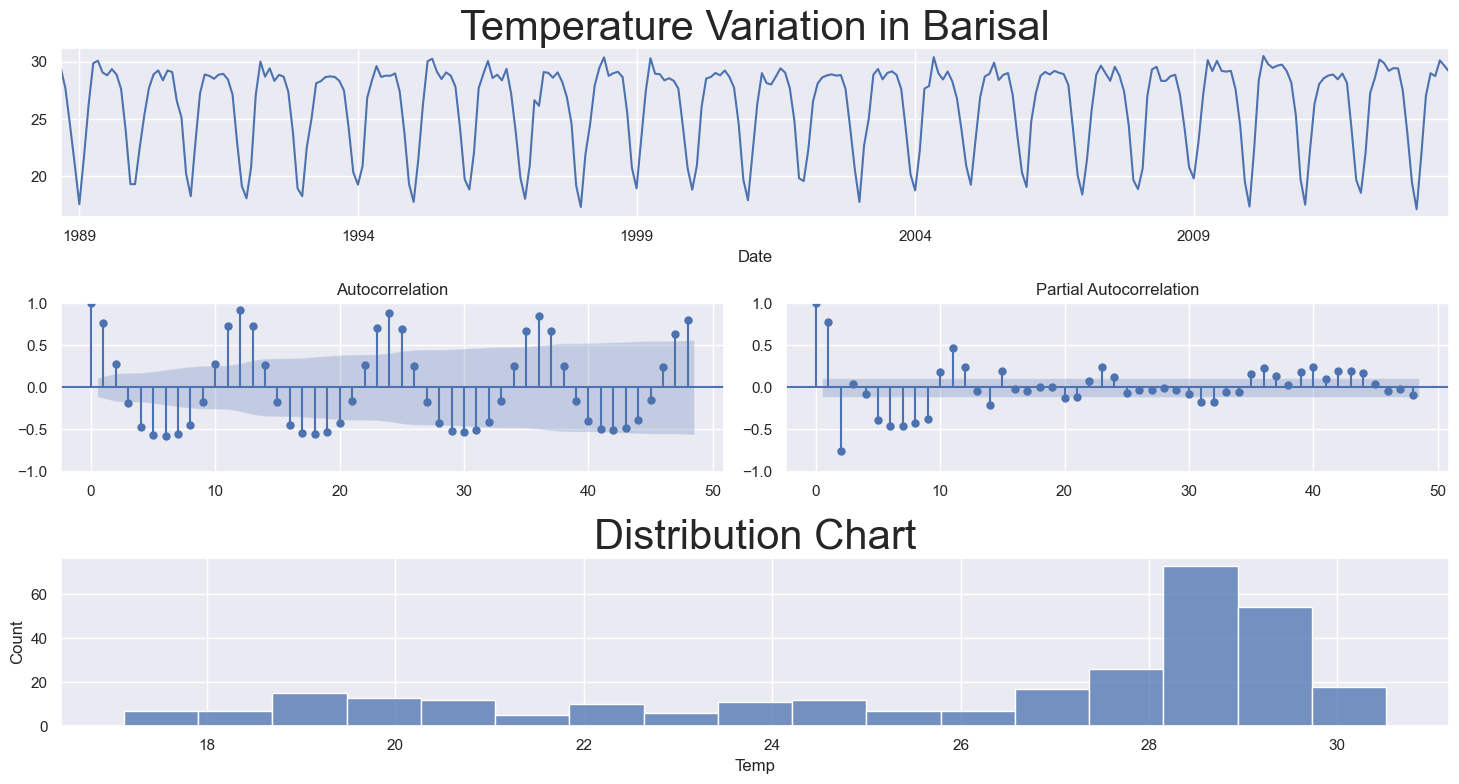

In [108]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns
from math import sqrt

# Simulate the splitting of the dataset (assuming 'barisal' DataFrame contains the Barisal temperature data)
df_train = barisal[-300:]
df_val = barisal[200:300]
df_test = barisal[:-200]

# Perform Augmented Dickey-Fuller Test on the training set
print('Augmented Dickey-Fuller Test Results')

test_data = adfuller(df_train['Temp'].values, autolag='AIC')

data_output = pd.Series(test_data[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])

for key, value in test_data[4].items():
    data_output[f'Critical Value ({key})'] = value

print(data_output)

# Define a function to plot the results of the ADF test along with ACF and PACF plots
def check_stationarity(y, lags_plots=48, figsize=(22, 8)):
    y = pd.Series(y)
    fig = plt.figure(figsize=figsize)
    layout = (3, 3)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    dist_ax = plt.subplot2grid(layout, (2, 0), colspan=2)

    y.plot(ax=ts_ax)
    ts_ax.set_title('Temperature Variation in Barisal', fontsize = 30)
    plot_acf(y, lags=lags_plots, ax=acf_ax)
    plot_pacf(y, lags=lags_plots, ax=pacf_ax)
    sns.histplot(y, bins=int(sqrt(len(y))), ax=dist_ax)
    dist_ax.set_title('Distribution Chart', fontsize = 30)

    plt.tight_layout()
    
    # Saving the figure (uncomment the following line if running in an environment that allows file saving)
    # plt.savefig(f"./DataViz/Barisal/AdfullerTest.png")
    
    print('Results of Dickey-Fuller Test:')
    adfinput = adfuller(y)
    adftest = pd.Series(adfinput[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
    adftest = adftest.round(4)
    
    for key, value in adfinput[4].items():
        adftest[f"Critical Value ({key})"] = value.round(4)
        
    print(adftest)
    
    if adftest['Test Statistic'] < adftest[f'Critical Value (5%)']:
        print('\nThe Test Statistic is lower than the Critical Value of 5%.\nThe series appears to be stationary.')
    else:
        print("\nThe Test Statistic is higher than the Critical Value of 5%.\nThe series isn't stationary.")
        
# Applying the check_stationarity function on the training set
check_stationarity(df_train['Temp'])


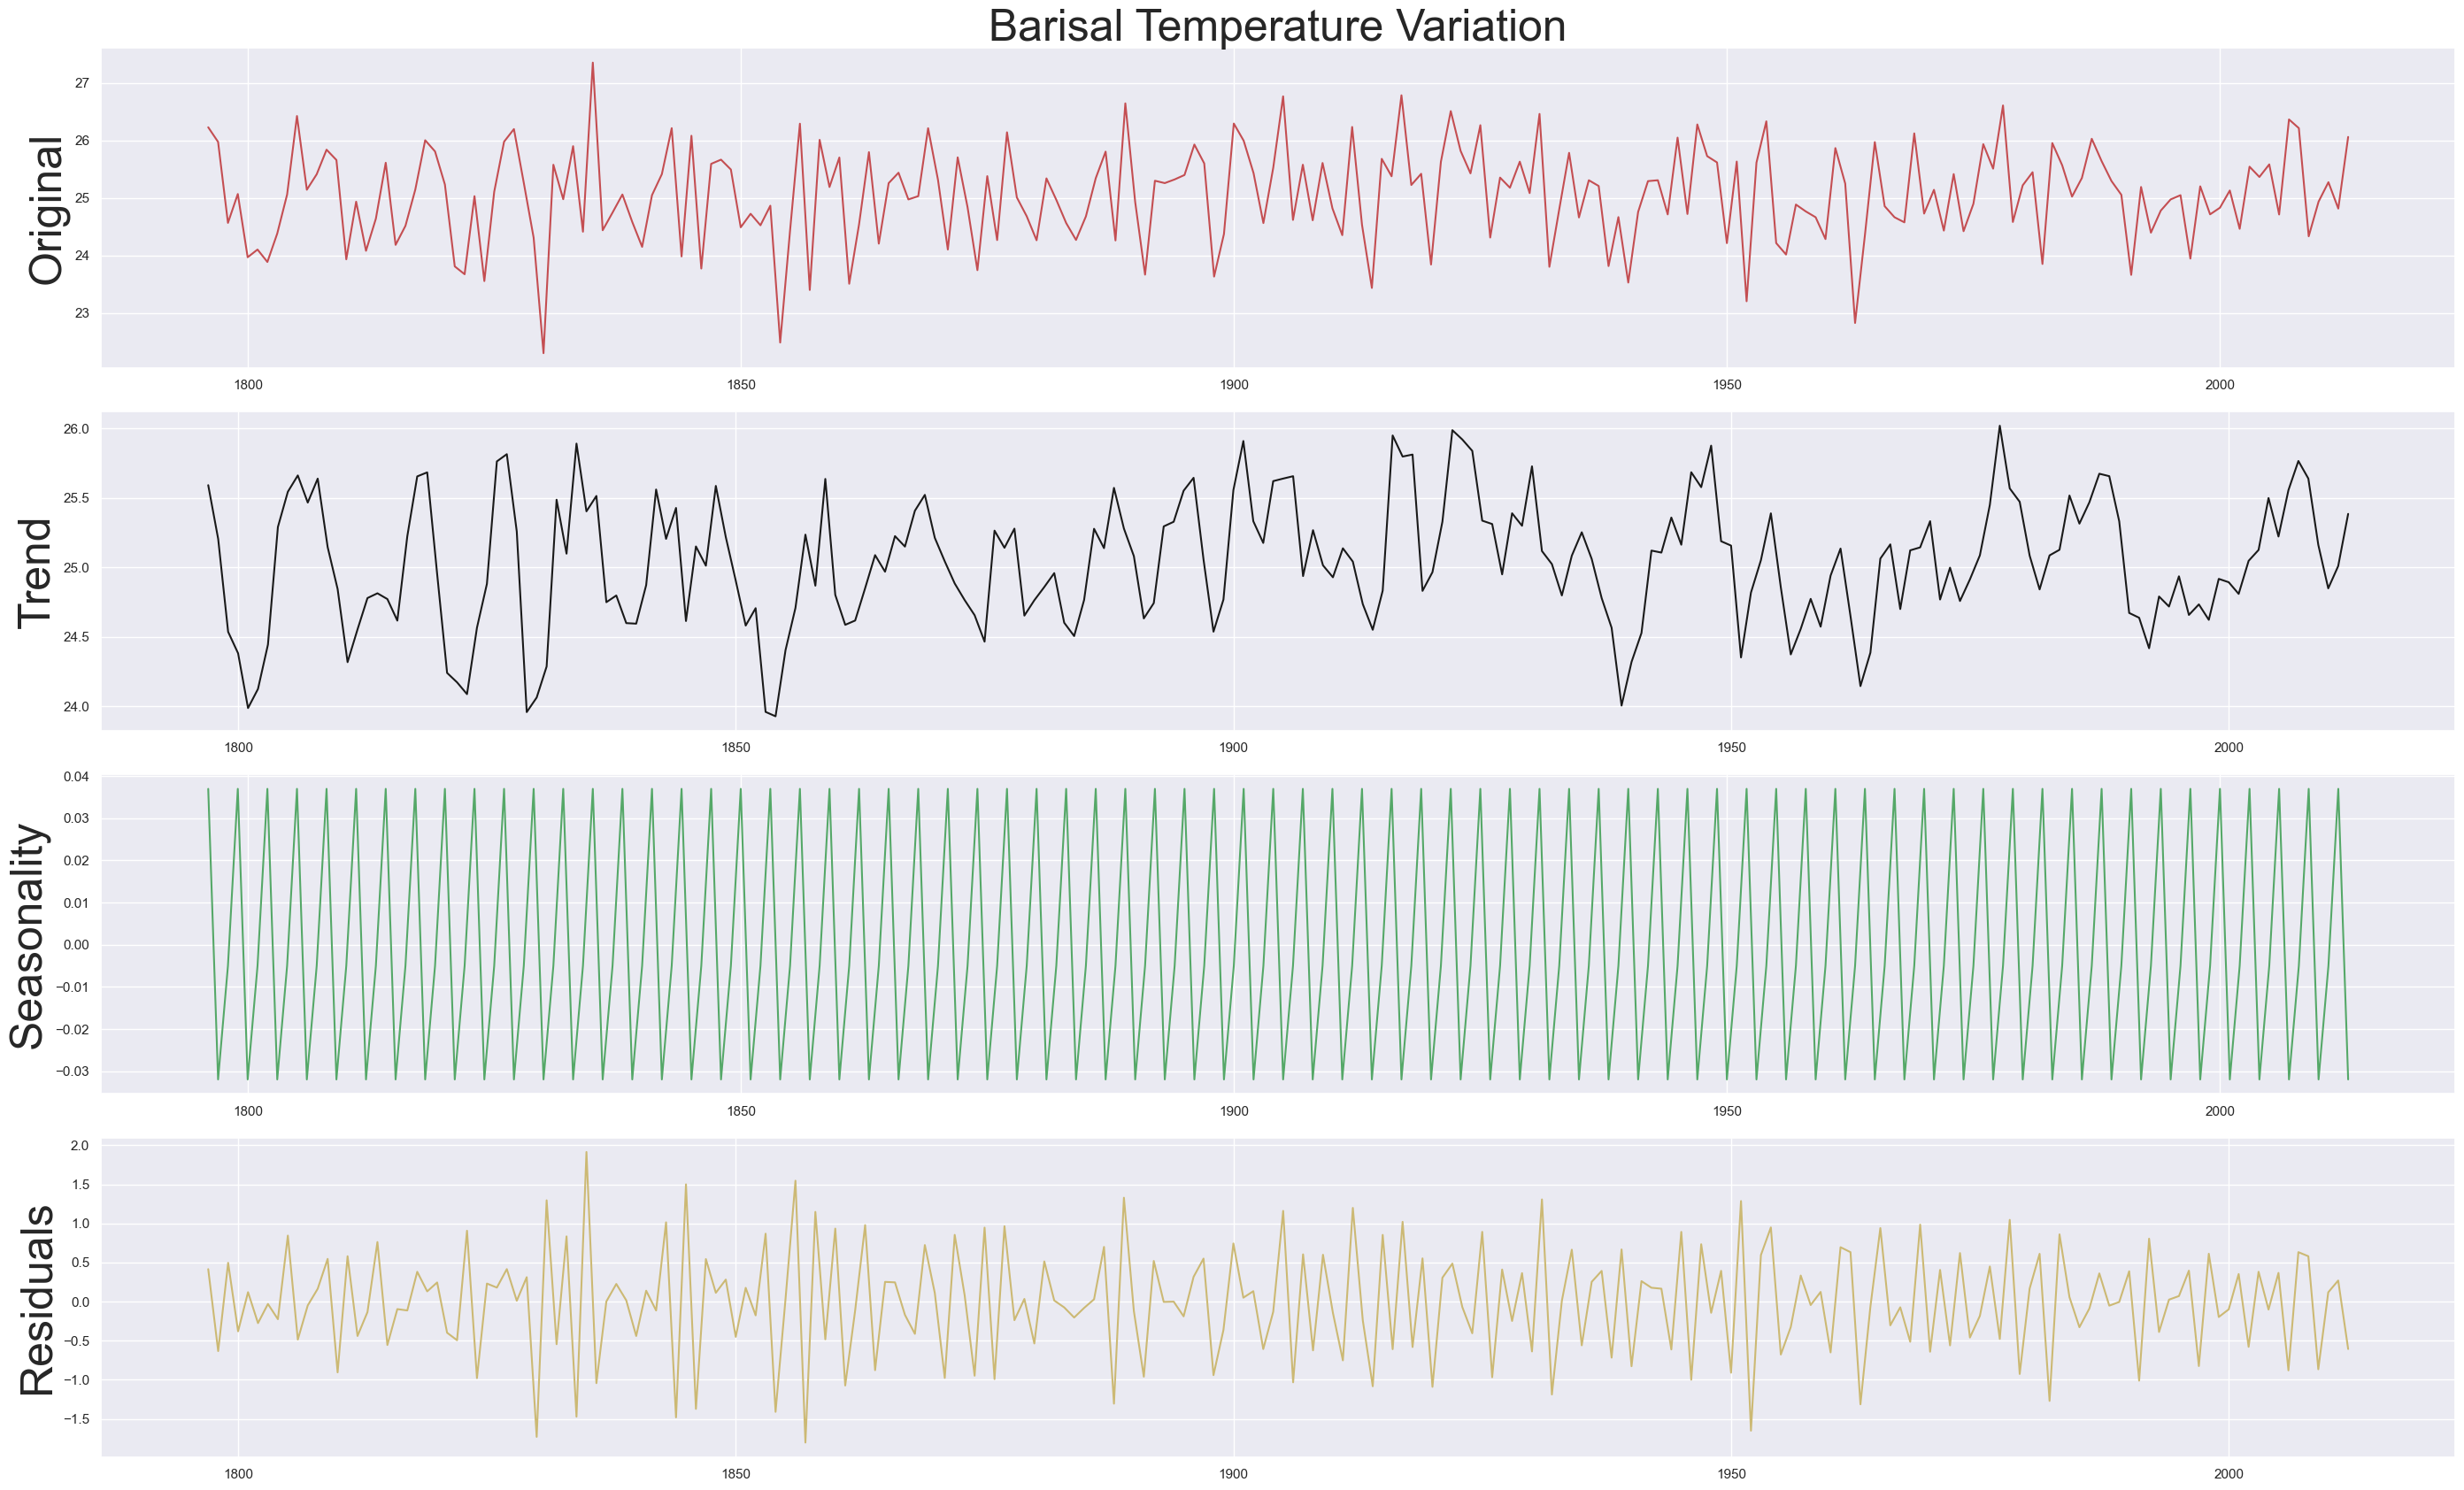

In [106]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'Temp' is the temperature column and using the yearly data for Barisal
# Decomposing with a period of 3 for the demonstration due to the limited data
decomp = seasonal_decompose(yearly_avg_temp_barisal['Temp'], model='additive', period=3)
trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

# Plotting the decomposed components of the time series
fig, axes = plt.subplots(4, 1, figsize=(28, 17))

axes[0].plot(yearly_avg_temp_barisal['Temp'], 'r-')
axes[0].set_ylabel('Original', fontsize = 36)
axes[0].set_title('Barisal Temperature Variation', fontsize = 36)

axes[1].plot(trend, 'k-')
axes[1].set_ylabel('Trend', fontsize = 36)

axes[2].plot(seasonal, 'g-')
axes[2].set_ylabel('Seasonality', fontsize = 36)

axes[3].plot(residual, 'y-')
axes[3].set_ylabel('Residuals', fontsize = 36)

plt.tight_layout()  # Adjust subplots to fit in the figure area
plt.show()


- ### 11. Analysis of the project " Climate Change in Barisal, Bangladesh"

- #### A stationary time series denotes a process where the statistical properties, such as the mean, variance, and autocorrelation, of the time series data are constant over time.  We can infer some specifics about how climate change is manifesting. Typically, warmer months, such as those in the summer season—June, July, and August—show an upward trend in temperatures, indicating that these months are becoming increasingly hotter over the years. This is a clear signal of global warming's impact on extending and intensifying heatwaves.The seasonal decomposition might reveal that the amplitude of seasonal fluctuations is growing, suggesting not just hotter summers but potentially colder winters as well, indicative of increased climate variability. For instance, December, January, and February could exhibit lower temperatures in the trend component, contrasting with the warmer months. The sharp increase in temperature observed in September, followed by a sharp decrease in November, as indicated by the monthly average temperature plots, can be attributed to several climatological and environmental factors. This pattern suggests a distinct transition between seasons, with September potentially marking the end of the monsoon season or a delayed peak of summer heat. The increase could also be influenced by specific atmospheric conditions, such as high pressure systems that trap heat, or oceanic patterns that drive warmer air towards the region. The subsequent sharp decrease in November signifies the onset of the winter season, where cooler air masses begin to dominate, possibly due to shifting wind patterns, decreased solar radiation, and the onset of the northeast monsoon in some parts of South Asia, which can bring cooler, drier air. This transition is often abrupt in tropical and subtropical climates, where the difference between the wet and dry seasons can be pronounced, leading to significant temperature variations within a short period. Furthermore, these patterns could be exaggerated by climate change, with increased volatility in weather patterns leading to more pronounced shifts. The sharp increase in September might also reflect an intensification of late-summer heatwaves, a phenomenon becoming more common with global warming. Similarly, the sharp decrease in November could be part of an emerging pattern of more sudden and early arrivals of winter conditions, disrupting traditional seasonal transitions. The autocorrelation function (ACF) and partial autocorrelation function (PACF) plots might indicate that temperature data is increasingly correlated with its past values, especially in the warmer months, underscoring the persistence of high temperatures across years.



